<a href="https://colab.research.google.com/github/simseoyoung/Deep-Learning/blob/main/CH.3/3_3_Optimizer_MNIST(ADAM)_Answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Class 방식으로 Adam Optimzer 를 쓰는 pytorch 코드를 구현한다

In [ ]:
# warning message 제거
!pip install python-mnist==0.5
!pip install keras
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from tensorflow import keras

import random

In [ ]:
from mnist import MNIST

import torch.utils.data as data_utils
from torch.utils.data import DataLoader

# loss 값 ploting 을 위해 사용
import matplotlib.pyplot as plt

Check GPU and fix the random seed

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

cpu


### Load Dataset and preprocessing

In [ ]:
mnist = keras.datasets.mnist
# MNIST 데이터셋 학습용(x,y), 테스트용(x,y)으로 나누기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# data 는 list 형식을 되어 있으므로 shape 을 보고, 이미지 visualization 을 하기 편한 array 형태로 바꾸어준다.

x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)

print("x_train 의 shape={}, y_train 의 shape={}".format(x_train.shape,y_train.shape))
print("x_test 의 shape={}, y_test 의 shape={}".format(x_test.shape,y_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
x_train 의 shape=(60000, 28, 28), y_train 의 shape=(60000,)
x_test 의 shape=(10000, 28, 28), y_test 의 shape=(10000,)


### Convert array data into Tensor Dataset

1. array 형태의 x와 y data 를 TensorDataset 형태로 train_data 에 담고

In [ ]:
train_data = data_utils.TensorDataset(torch.FloatTensor(x_train), torch.FloatTensor(y_train))

2. 하나로 묶어준 x tensor, y tensor data 를 batch 단위로 나누어서 trainloader 에 담아준다

In [ ]:
batch_size = 1000
trainloader = data_utils.DataLoader(train_data, batch_size = batch_size, shuffle = True)

tensor(0.)


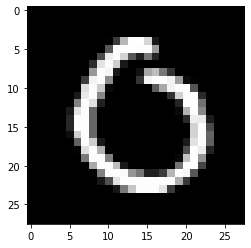

In [ ]:
for batch_idx, (image, label) in enumerate(trainloader):
    plt.imshow(image[0].reshape(28,28), cmap = 'gray')
    print(label[0])
    break

### Define Linear Model using with ReLU
### Use Forward Function

In [ ]:
class Adam_Model(nn.Module):
    def __init__(self):
        super(Adam_Model, self).__init__()
        
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,10)
        
    def forward(self, x):
        h1 = F.relu(self.fc1(x))
        h2 = F.relu(self.fc2(h1))
        class_label = self.fc3(h2)
        
        return class_label       

In [ ]:
model = Adam_Model().to(device)

### dummy data

In [ ]:
# CNN => convoulutional layer 사용 => kernel size, stride, padding => output size

In [ ]:
# 직접 데이터를 만들기 힘들 때 사이즈를 맞춘 dummy data 사용
a = torch.Tensor(1,784).to(device)

In [ ]:
model(a).shape

torch.Size([1, 10])

### Set parameters

In [ ]:
epoch = 15
learning_rate = 0.01
weight_decay = 1e-5

### Define Loss Function & Define Optimizer

In [ ]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=weight_decay)

### Train

In [ ]:
# model = Adam_Model().to(device)

loss_list = []

for epoch_num in range(epoch):
    average_loss = 0
        
    for batch_idx, (x_data, y_label) in enumerate(trainloader):
        
        num_of_mini_batch = len(trainloader)
        
        images = x_data.to(device)
        labels = y_label.to(device)
        
        # zero_grad 한 후 () 를 꼭 빼먹지 않도록한다
        optimizer.zero_grad()
        
        predict = model(images)
        
        y_label_long = torch.tensor(labels, dtype = torch.long)
        y_label_long = y_label_long.to(device)
        
        loss = loss_function(predict, y_label_long)
        
        # 마찬가지로 ()를 꼭 넣어준다
        loss.backward()
        
        optimizer.step()
        
        average_loss += (loss.item()/num_of_mini_batch)
        loss_list.append(loss)
     
                
    print("epoch {} 의 평균 loss 값은 ==> {:.5f}".format((epoch_num+1), average_loss))

In [ ]:
# 60000개를 1000 배치로 나누었을때 60이 되므로 epoch 하나당 60 묶음의 배치가 학습이된다
# 15 epoch 이므로 900 묶음의 배치가 학습이 되게 되고 list 에 append 되는 loss value 도 900 개가 된다.
print("loss_list의 길이 =",len(loss_list))

loss_list의 길이 = 900


In [ ]:
loss_list[:10]

[tensor(11.8309, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(184.9861, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(120.8217, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(59.9786, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(31.2644, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(17.5259, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(8.0432, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(5.3625, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(2.2147, device='cuda:0', grad_fn=<NllLossBackward>),
 tensor(1.9889, device='cuda:0', grad_fn=<NllLossBackward>)]

### 2번째 epoch 의 loss 값을 한 번 재확인

In [ ]:
# epoch 하나당 60개의 batch 묶음
epoch_loss = 0
for i in range(60):
    epoch_loss = epoch_loss + loss_list[i+60]
    
print(epoch_loss/60)

tensor(1.2891, device='cuda:0', grad_fn=<DivBackward0>)


In [ ]:
from matplotlib import pyplot as plt

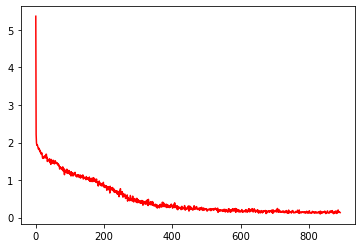

In [ ]:
plt.plot(np.array(loss_list[7:]), 'r')

In [ ]:
import pickle

# wb - 바이트 형식으로 저장

with open('ADAM.pickle', 'wb') as f:
    pickle.dump(loss_list, f)

### Test code??

Load test dataset

In [ ]:
test_data = data_utils.TensorDataset(torch.FloatTensor(x_test), torch.FloatTensor(y_test))

testloader = data_utils.DataLoader(test_data, batch_size = 5000, shuffle = False)

In [ ]:
with torch.no_grad():
    num_total_data = 0
    correct = 0
    
    for batch_idx, (images, labels) in enumerate(testloader):
        
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        output_softmax = torch.nn.functional.softmax(outputs)
        predicted = torch.argmax(output_softmax, dim = 1)
        
        num_total_data += len(images)
        
        answer = sum(labels == predicted).item()
        correct += answer
        
    print("Adam 을 사용한 model 의 accuracy는 %.2f%%" %((correct/num_total_data)*100))

Adam 을 사용한 model 의 accuracy는 95.13%
